<a href="https://colab.research.google.com/github/ven7sg/DS-3001-project-voting/blob/main/Project3_model%26VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/ven7sg/DS-3001-project-voting.git

fatal: destination path 'DS-3001-project-voting' already exists and is not an empty directory.


In [163]:
#!rm -r DS-3001-project-voting

In [3]:
!pip3 install mapclassify

In [4]:
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
gdf = gpd.read_file('/content/drive/My Drive/Colab Notebooks/va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
cdf = pd.read_csv('/content/DS-3001-project-voting/cleaned data/county_final.csv') # Load county adjacency data and population data
vdf = pd.read_csv('/content/DS-3001-project-voting/cleaned data/voting_final.csv') # Load historical voting data
merged = pd.read_csv('/content/DS-3001-project-voting/cleaned data/merged_final.csv') #merged cdf and vdf

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='county_fips')  # merge county population and adjacency data into df


In [7]:
nhgis_county_data=gpd.read_file('/content/DS-3001-project-voting/data/0002_ds250_20205_county_E.csv')
nhgis_county_data

,field_1,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,...,AM8FE032,AM8FE033,AM8FE034,AM8FE035,AM8FE036,AM8FE037,AM8FE038,AM8FE039,AM9SE001,geometry
0,1,GIS Join Match Code,Data File Year,State Postal Abbreviation,Region Code,Division Code,State Name,State Code,County Name,County Code,...,Female: 35 to 64 years: With a disability,Female: 35 to 64 years: No disability,Female: 65 to 74 years,Female: 65 to 74 years: With a disability,Female: 65 to 74 years: No disability,Female: 75 years and over,Female: 75 years and over: With a disability,Female: 75 years and over: No disability,Gini Index,None
1,2,G0100010,2016-2020,AL,,,Alabama,01,Autauga County,001,...,2064,9259,2741,898,1843,1962,1255,707,0.4552,None
2,3,G0100030,2016-2020,AL,,,Alabama,01,Baldwin County,003,...,5851,39064,14209,2921,11288,9539,4370,5169,0.4566,None
3,4,G0100050,2016-2020,AL,,,Alabama,01,Barbour County,005,...,859,3384,1554,436,1118,1074,709,365,0.5047,None
4,5,G0100070,2016-2020,AL,,,Alabama,01,Bibb County,007,...,656,3561,1098,235,863,871,433,438,0.4500,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,3218,G7201450,2016-2020,PR,,,Puerto Rico,72,Vega Baja Municipio,145,...,2511,8020,3059,1350,1709,2644,1570,1074,0.4942,None
3218,3219,G7201470,2016-2020,PR,,,Puerto Rico,72,Vieques Municipio,147,...,82,1578,525,28,497,466,219,247,0.4471,None
3219,3220,G7201490,2016-2020,PR,,,Puerto Rico,72,Villalba Municipio,149,...,1160,3301,1264,656,608,853,596,257,0.5419,None
3220,3221,G7201510,2016-2020,PR,,,Puerto Rico,72,Yabucoa Municipio,151,...,566,6229,2079,517,1562,1636,789,847,0.4987,None


## clean nhgis data 2020

In [8]:
#nhgis county data cleaning (Carol Wu)
virginia_data = nhgis_county_data[nhgis_county_data['STATE'] == 'Virginia']

#remove YEAR STUSAB REGIONA DIVISIONA STATE STATEA (all VA 2016-2020)
for col in virginia_data.columns:
    if len(virginia_data[col].unique()) == 1:
        virginia_data.drop(col,inplace=True,axis=1)
#select nativity, poverty status by sex, gini index of income ineuqality col
VAcounty_data = virginia_data[['COUNTY','AM0KE002','AM0KE003','AM0KE004','AM0KE005','AM0KE006','AM63E003','AM63E017','AM63E032','AM63E046','AM9SE001']]

<ipython-input-8-9fcc5cb37642>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data.drop(col,inplace=True,axis=1)
<ipython-input-8-9fcc5cb37642>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data.drop(col,inplace=True,axis=1)
<ipython-input-8-9fcc5cb37642>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_data.drop(col,inplace=True,axis=1)
<ipython-input-8-9fcc5cb37642>:7: SettingWithCopyWarning: 
A value 

In [9]:
column_mapping = {
    'COUNTY' : 'county',
    'AM0KE002': 'U.S. citizen, born in the United States',
    'AM0KE003': 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
    'AM0KE004': 'U.S. citizen, born abroad of American parent(s)',
    'AM0KE005': 'U.S. citizen by naturalization',
    'AM0KE006': 'Not a U.S. citizen',
    'AM63E003': 'Income in the past 12 months below poverty level: Male',
    'AM63E017': 'Income in the past 12 months below poverty level: Female',
    'AM63E032': 'Income in the past 12 months at or above poverty level: Male',
    'AM63E046':  'Income in the past 12 months at or above poverty level: Female',
    'AM9SE001':   'Gini Index'
}

# Rename the columns
VAcounty_data = VAcounty_data.rename(columns=column_mapping)

In [10]:
cols_to_convert = VAcounty_data.columns.difference(['county'])
VAcounty_data[cols_to_convert] = VAcounty_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

VAcounty_data

,county,"U.S. citizen, born in the United States","U.S. citizen, born in Puerto Rico or U.S. Island Areas","U.S. citizen, born abroad of American parent(s)",U.S. citizen by naturalization,Not a U.S. citizen,Income in the past 12 months below poverty level: Male,Income in the past 12 months below poverty level: Female,Income in the past 12 months at or above poverty level: Male,Income in the past 12 months at or above poverty level: Female,Gini Index
2822,Accomack County,29524,119,192,782,1943,3092,3281,12623,13231,0.4562
2823,Albemarle County,95653,469,1470,5183,6044,3404,4349,44538,48856,0.4719
2824,Alleghany County,14733,0,111,91,95,965,1350,6272,6157,0.4537
2825,Amelia County,12694,0,97,73,106,695,687,5822,5669,0.4320
2826,Amherst County,30977,71,151,361,222,1685,1708,13478,14131,0.4239
...,...,...,...,...,...,...,...,...,...,...,...
2950,Suffolk city,86063,436,1373,1970,1541,3425,4905,40504,41975,0.4463
2951,Virginia Beach city,394661,4085,8526,27552,16058,13645,18072,200829,208107,0.4296
2952,Waynesboro city,20936,33,299,325,707,1513,1760,9252,9514,0.4817
2953,Williamsburg city,13494,30,269,434,807,815,789,4389,4537,0.5440


## Kernel Density nhgis 2020 data

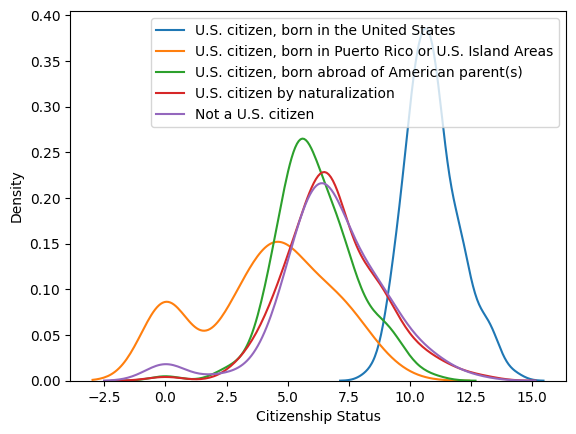

In [11]:
import seaborn as sns
numeric_vars = ['U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'U.S. citizen, born abroad of American parent(s)', 'U.S. citizen by naturalization', 'Not a U.S. citizen']
for column in numeric_vars:
    VAcounty_data[column] = np.arcsinh(VAcounty_data[column])
    sns.kdeplot(VAcounty_data[column], label=column)
plt.xlabel('Citizenship Status')
plt.legend()
plt.show()




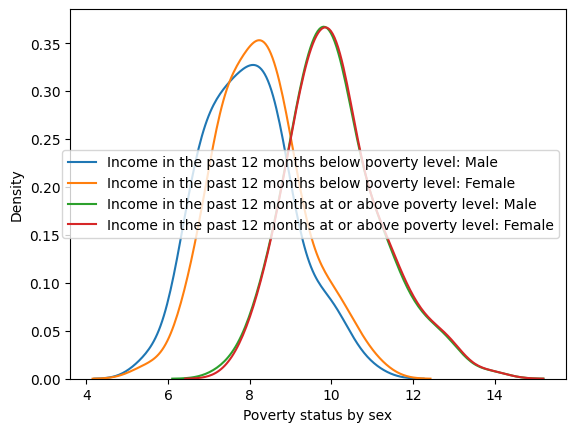

In [12]:
numeric_vars = ['Income in the past 12 months below poverty level: Male', 'Income in the past 12 months below poverty level: Female', 'Income in the past 12 months at or above poverty level: Male', 'Income in the past 12 months at or above poverty level: Female']
for column in numeric_vars:
    VAcounty_data[column] = np.arcsinh(VAcounty_data[column])
    sns.kdeplot(VAcounty_data[column], label=column)
plt.xlabel('Poverty status by sex')
plt.legend()
plt.show()


<Axes: xlabel='Gini Index', ylabel='Density'>

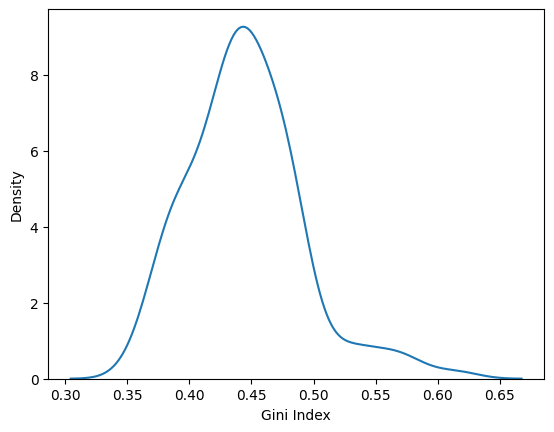

In [13]:

sns.kdeplot(VAcounty_data['Gini Index'], label=column)

In [14]:
vdf20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data
Dvotes = vdf20.loc[(vdf20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
Rvotes = vdf20.loc[(vdf20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')

Dvotes_index = Dvotes.index
FIP = Dvotes_index.tolist()
print(FIP)
VAcounty_data['county_fips'] = FIP
VAcounty_data = VAcounty_data.merge(Dvotes,left_on='county_fips',right_on='county_fips') #for mapping
VAcounty_data = VAcounty_data.merge(Rvotes,left_on='county_fips',right_on='county_fips') #for mapping

[51001, 51003, 51005, 51007, 51009, 51011, 51013, 51015, 51017, 51019, 51021, 51023, 51025, 51027, 51029, 51031, 51033, 51035, 51036, 51037, 51041, 51043, 51045, 51047, 51049, 51051, 51053, 51057, 51059, 51061, 51063, 51065, 51067, 51069, 51071, 51073, 51075, 51077, 51079, 51081, 51083, 51085, 51087, 51089, 51091, 51093, 51095, 51097, 51099, 51101, 51103, 51105, 51107, 51109, 51111, 51113, 51115, 51117, 51119, 51121, 51125, 51127, 51131, 51133, 51135, 51137, 51139, 51141, 51143, 51145, 51147, 51149, 51153, 51155, 51157, 51159, 51161, 51163, 51165, 51167, 51169, 51171, 51173, 51175, 51177, 51179, 51181, 51183, 51185, 51187, 51191, 51193, 51195, 51197, 51199, 51510, 51520, 51530, 51540, 51550, 51570, 51580, 51590, 51595, 51600, 51610, 51620, 51630, 51640, 51650, 51660, 51670, 51678, 51680, 51683, 51685, 51690, 51700, 51710, 51720, 51730, 51735, 51740, 51750, 51760, 51770, 51775, 51790, 51800, 51810, 51820, 51830, 51840]


In [15]:
VAcounty_data

,county,"U.S. citizen, born in the United States","U.S. citizen, born in Puerto Rico or U.S. Island Areas","U.S. citizen, born abroad of American parent(s)",U.S. citizen by naturalization,Not a U.S. citizen,Income in the past 12 months below poverty level: Male,Income in the past 12 months below poverty level: Female,Income in the past 12 months at or above poverty level: Male,Income in the past 12 months at or above poverty level: Female,Gini Index,county_fips,dem_votes_2020,rep_votes_2020
0,Accomack County,10.986106,5.472288,5.950649,7.355002,8.265136,8.729721,8.789051,10.136423,10.183465,0.4562,51001,7578,9172
1,Albemarle County,12.161630,6.843751,7.986165,9.246287,9.399969,8.825854,9.070848,11.397245,11.489780,0.4719,51003,42466,20804
2,Alleghany County,10.290992,0.000000,5.402698,5.204037,5.247052,7.565276,7.901007,9.436998,9.418492,0.4537,51005,2243,5859
3,Amelia County,10.142032,0.000000,5.267885,4.983654,5.356609,7.237060,7.225482,9.362546,9.335915,0.4320,51007,2411,5390
4,Amherst County,11.034147,4.955877,5.710438,6.582027,6.095830,8.122668,8.136226,10.201961,10.249273,0.4239,51009,5672,11041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Suffolk city,12.055982,6.770791,7.917901,8.278936,8.033334,8.832004,9.191158,11.302303,11.337977,0.4463,51800,28676,20082
129,Virginia Beach city,13.578930,9.008224,9.744023,10.916978,10.377110,10.214276,10.495266,12.903356,12.938955,0.4296,51810,117393,105087
130,Waynesboro city,10.642373,4.189884,6.393594,6.476975,7.254178,8.014997,8.166216,9.825742,9.853667,0.4817,51820,4961,5507
131,Williamsburg city,10.203148,4.094622,6.287862,6.766193,7.386471,7.396336,7.363914,9.080004,9.113168,0.5440,51830,4790,1963


In [16]:
VAcounty_data['net_vote_count'] = VAcounty_data['rep_votes_2020']-VAcounty_data['dem_votes_2020']
VAcounty_data['net_vote_count'] = np.arcsinh(VAcounty_data['net_vote_count'])

<Axes: xlabel='net_vote_count', ylabel='Density'>

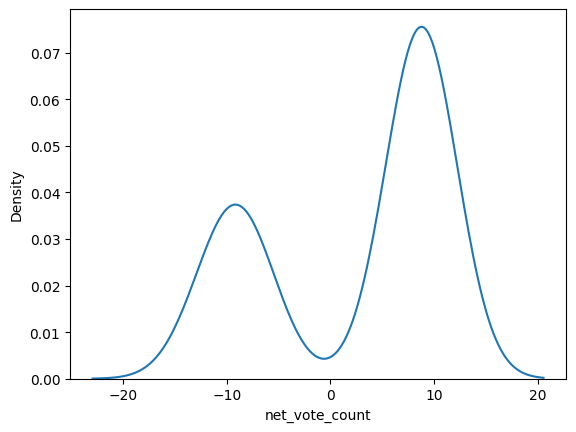

In [17]:
sns.kdeplot(VAcounty_data['net_vote_count'], label=column)

## clean NHGIS 2022 data

In [18]:
# clean 2022 data
nhgis_2022 = gpd.read_file('/content/DS-3001-project-voting/data/nhgis0001_ds261_2022_county.csv')
nhgis_2022

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,APYUM052,APYUM053,APYUM054,APYUM055,APYUM056,APYUM057,APYUM058,APYUM059,AP38M001,geometry
0,G0100030,2022,AL,,,Alabama,01,Baldwin County,003,,...,661,1093,990,1042,1139,1361,914,989,0.0244,None
1,G0100150,2022,AL,,,Alabama,01,Calhoun County,015,,...,452,923,907,709,1003,577,764,463,0.0354,None
2,G0100430,2022,AL,,,Alabama,01,Cullman County,043,,...,459,532,640,588,720,576,258,479,0.0428,None
3,G0100490,2022,AL,,,Alabama,01,DeKalb County,049,,...,332,467,557,735,428,637,402,501,0.0265,None
4,G0100510,2022,AL,,,Alabama,01,Elmore County,051,,...,351,362,676,579,545,527,397,278,0.0287,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,G7201130,2022,PR,,,Puerto Rico,72,Ponce Municipio,113,,...,305,660,863,663,702,776,906,697,0.0264,None
844,G7201270,2022,PR,,,Puerto Rico,72,San Juan Municipio,127,,...,730,1355,1450,1309,1442,1429,1298,1448,0.0241,None
845,G7201350,2022,PR,,,Puerto Rico,72,Toa Alta Municipio,135,,...,547,459,671,538,376,373,468,345,0.0316,None
846,G7201370,2022,PR,,,Puerto Rico,72,Toa Baja Municipio,137,,...,444,413,695,721,467,548,469,548,0.0280,None


In [19]:
VA_2022 = nhgis_2022[nhgis_2022['STATE'] == 'Virginia']

#remove YEAR STUSAB REGIONA DIVISIONA STATE STATEA (all VA 2016-2020)
for col in VA_2022.columns:
    if len(VA_2022[col].unique()) == 1:
        VA_2022.drop(col,inplace=True,axis=1)
#select nativity, poverty status by sex, gini index of income ineuqality col
VAcounty_data_2022 = VA_2022[['COUNTY','APLBE002','APLBE003','APLBE004','APLBE005','APLBE006','APYUE003','APYUE017','APYUE032','APYUE046','AP38E001']]

<ipython-input-19-b872a8edc945>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_2022.drop(col,inplace=True,axis=1)
<ipython-input-19-b872a8edc945>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_2022.drop(col,inplace=True,axis=1)
<ipython-input-19-b872a8edc945>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_2022.drop(col,inplace=True,axis=1)
<ipython-input-19-b872a8edc945>:6: SettingWithCopyWarning: 
A value is trying to b

In [20]:
column_mapping = {
    'COUNTY' : 'county',
    'APLBE002': 'U.S. citizen, born in the United States',
    'APLBE003': 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
    'APLBE004': 'U.S. citizen, born abroad of American parent(s)',
    'APLBE005': 'U.S. citizen by naturalization',
    'APLBE006': 'Not a U.S. citizen',
    'APYUE003': 'Income in the past 12 months below poverty level: Male',
    'APYUE017': 'Income in the past 12 months below poverty level: Female',
    'APYUE032': 'Income in the past 12 months at or above poverty level: Male',
    'APYUE046':  'Income in the past 12 months at or above poverty level: Female',
    'AP38E001':   'Gini Index'
}

# Rename the columns
VAcounty_data_2022 = VAcounty_data_2022.rename(columns=column_mapping)

In [21]:
cols_to_convert = VAcounty_data_2022.columns.difference(['county'])
VAcounty_data_2022[cols_to_convert] = VAcounty_data_2022[cols_to_convert].apply(pd.to_numeric, errors='coerce')

VAcounty_data_2022_X = VAcounty_data_2022[cols_to_convert]

## Kernel Density plot of 2022 NHGIS data

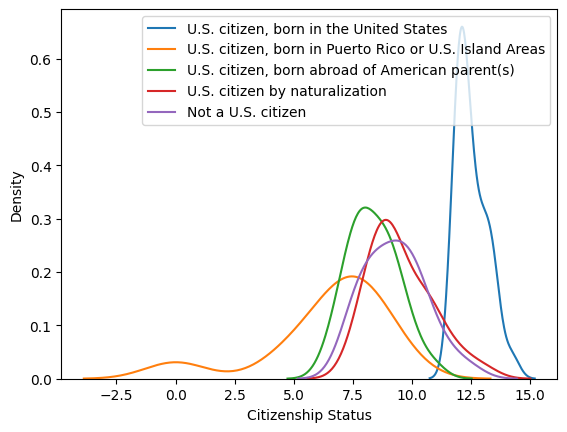

In [22]:

numeric_vars = ['U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'U.S. citizen, born abroad of American parent(s)', 'U.S. citizen by naturalization', 'Not a U.S. citizen']
for column in numeric_vars:
    VAcounty_data_2022[column] = np.arcsinh(VAcounty_data_2022[column])
    sns.kdeplot(VAcounty_data_2022[column], label=column)
plt.xlabel('Citizenship Status')
plt.legend()
plt.show()


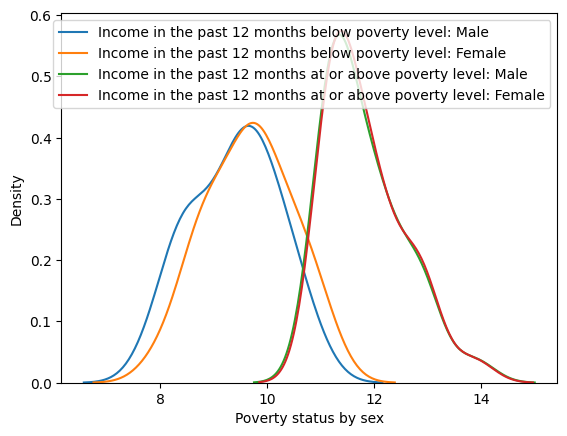

In [23]:
numeric_vars = ['Income in the past 12 months below poverty level: Male', 'Income in the past 12 months below poverty level: Female', 'Income in the past 12 months at or above poverty level: Male', 'Income in the past 12 months at or above poverty level: Female']
for column in numeric_vars:
    VAcounty_data_2022[column] = np.arcsinh(VAcounty_data_2022[column])
    sns.kdeplot(VAcounty_data_2022[column], label=column)
plt.xlabel('Poverty status by sex')
plt.legend()
plt.show()

<Axes: xlabel='Gini Index', ylabel='Density'>

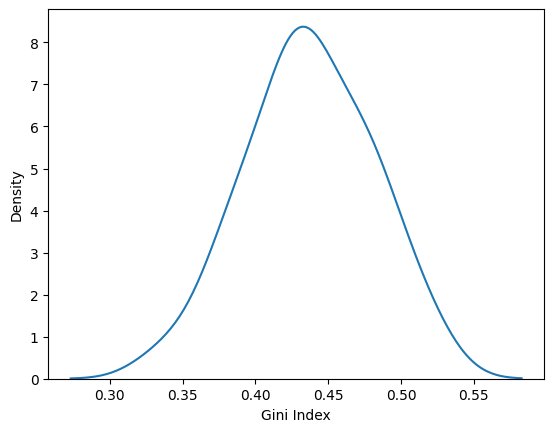

In [24]:
sns.kdeplot(VAcounty_data_2022['Gini Index'], label=column)

## regression model

Training RMSE: 5.747287444127889 R-squared: 0.583669016436785
Testing RMSE: 7.778432367842413 R-squared: -0.1416368633930496


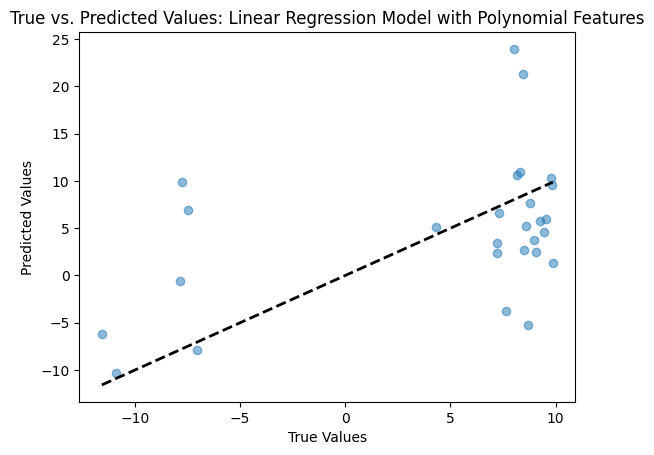

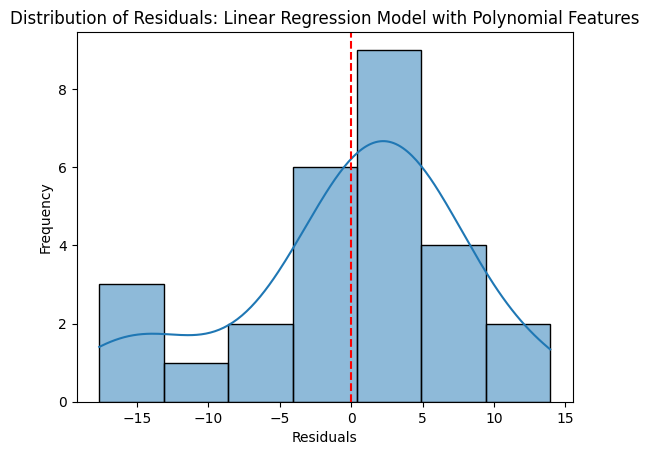

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming VAcounty_data is your DataFrame
# Replace 'dependent_variable_column_name' with the name of your dependent variable column
dependent_variable = 'net_vote_count'

# Variables to include in the model
numeric_vars = ['U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'U.S. citizen, born abroad of American parent(s)', 'U.S. citizen by naturalization', 'Not a U.S. citizen', 'Income in the past 12 months below poverty level: Male', 'Income in the past 12 months below poverty level: Female', 'Income in the past 12 months at or above poverty level: Male', 'Income in the past 12 months at or above poverty level: Female', 'Gini Index']

# Cast to numeric value
for var in numeric_vars:
    VAcounty_data[var] = pd.to_numeric(VAcounty_data[var], errors='coerce')


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(VAcounty_data[numeric_vars], VAcounty_data[dependent_variable], test_size=0.2, random_state=42)

# Linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# RMSE and R-squared for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print('Training RMSE:', train_rmse, 'R-squared:', train_r2)
print('Testing RMSE:', test_rmse, 'R-squared:', test_r2)

# Scatter plot for true vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values: Linear Regression Model with Polynomial Features')
plt.show()

# Residuals plot
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals: Linear Regression Model with Polynomial Features')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()


In [26]:
y_pred_numeric = linear_reg.predict(VAcounty_data_2022[numeric_vars])
# Apply the inverse hyperbolic sine transformation
y_pred_numeric_transformed = np.sinh(y_pred_numeric)
df_pred_votes = pd.DataFrame(y_pred_numeric_transformed, columns=['vote_difference_2024'])
df = pd.concat([df, df_pred_votes], axis=1)


In [31]:
df['vote_difference_2024'].fillna(0, inplace=True)

## Heatmap

In [27]:
# Visualize predicted votes in 2024 (Carol Wu)
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips')
df['vote_difference_2020'] = df['rep_votes_2020'] - df['dem_votes_2020']

In [32]:
#df.drop(columns=['dem_votes_2020','rep_votes_2020','vote_difference_2020','vote_difference_2024'], inplace=True)
df

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,N7,N8,N9,N10,N11,N12,vote_difference_2024,dem_votes_2020,rep_votes_2020,vote_difference_2020
0,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4.949957e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.837003,7578,9172,1594
1,51003,1675170,Albemarle,Albemarle County,L,Y,2021-03-29,CO,725.634334,2.310198e+05,...,LOUISA,FLUVANNA,BUCKINGHAM,NELSON,NaN,NaN,-1789.660949,42466,20804,-21662
2,51005,1492459,Alleghany,Alleghany County,V,N,2014-09-15,CO,449.544769,2.062654e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,3521.794432,2243,5859,3616
3,51007,1497770,Amelia,Amelia County,T,Y,2021-03-29,CO,360.945234,1.776617e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,5691.126891,2411,5390,2979
4,51009,1480095,Amherst,Amherst County,V,N,2020-09-11,CO,478.766949,1.876610e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,-14.352858,5672,11041,5369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,51800,1498560,Suffolk,Suffolk City,L,Y,2017-06-23,CI,428.933821,6.716418e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,28676,20082,-8594
129,51810,1498559,Virginia Beach,Virginia Beach City,L,Y,2017-01-25,CI,408.144012,1.350634e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,117393,105087,-12306
130,51820,1498443,Waynesboro,Waynesboro City,L,Y,2014-06-16,CI,15.110987,3.244646e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4961,5507,546
131,51830,1789076,Williamsburg,Williamsburg City,L,Y,2017-01-25,CI,9.032769,4.150800e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4790,1963,-2827


<Axes: >

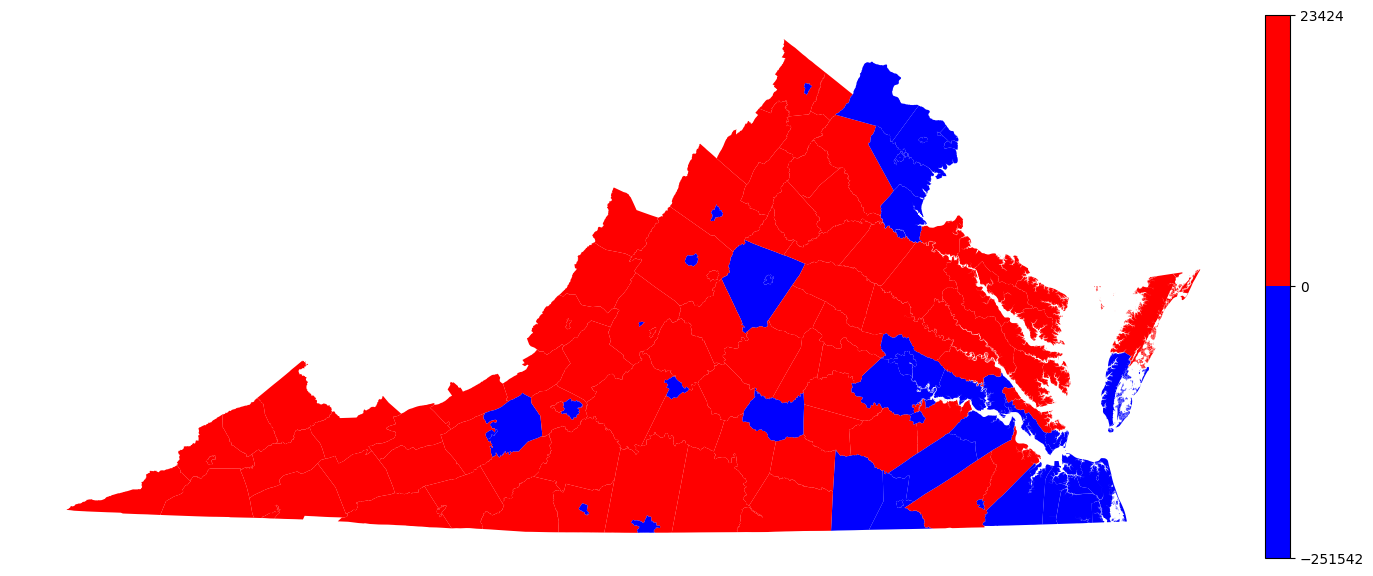

In [160]:
# Create a custom colormap with red for negative values and blue for positive values
from matplotlib.colors import ListedColormap, BoundaryNorm
# Define the colormap
my_colors = ['blue', 'white', 'red']
my_cmap = ListedColormap(my_colors)

# Define the bins and normalize and force 0 to be part of the colorbar
bounds = [np.min(df['vote_difference_2020']), 0.0, np.max(df['vote_difference_2020'])]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors));

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_difference_2020',legend=True,cax=cax,cmap=my_cmap, norm=my_norm)

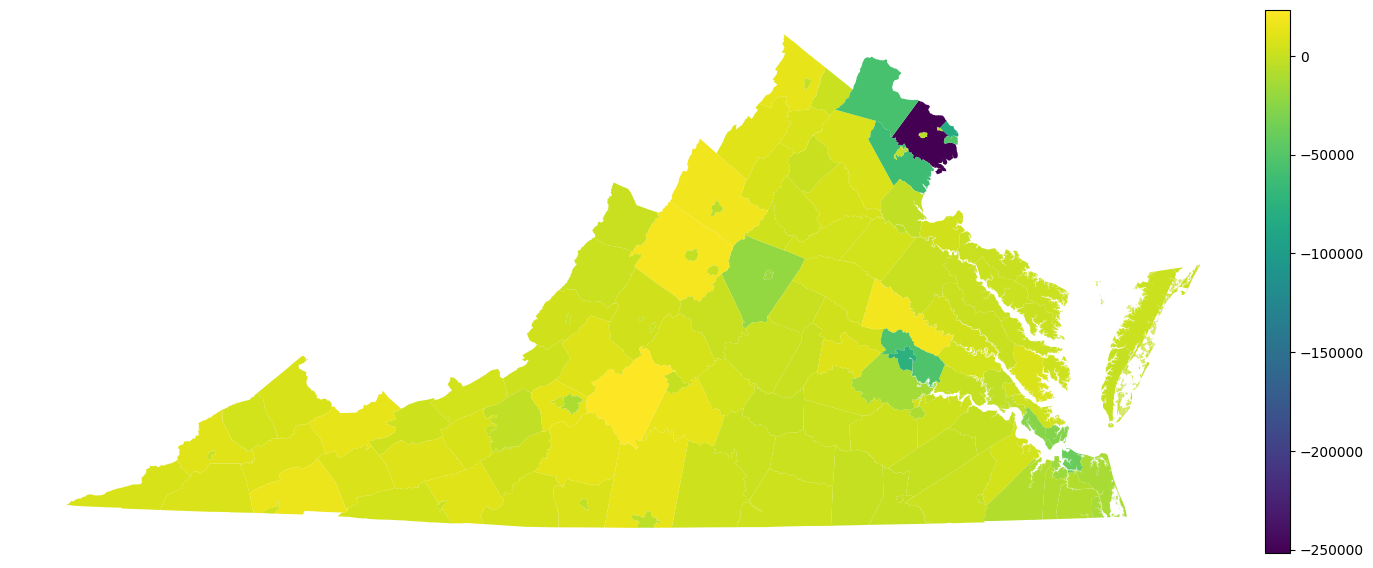

In [161]:
# Create a custom colormap with red for negative values and blue for positive values

# Plot the heatmap
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)

# Plot the heatmap with the custom colormap
df.plot(ax=ax, column='vote_difference_2020', legend=True, cax=cax)

plt.show()

<Axes: >

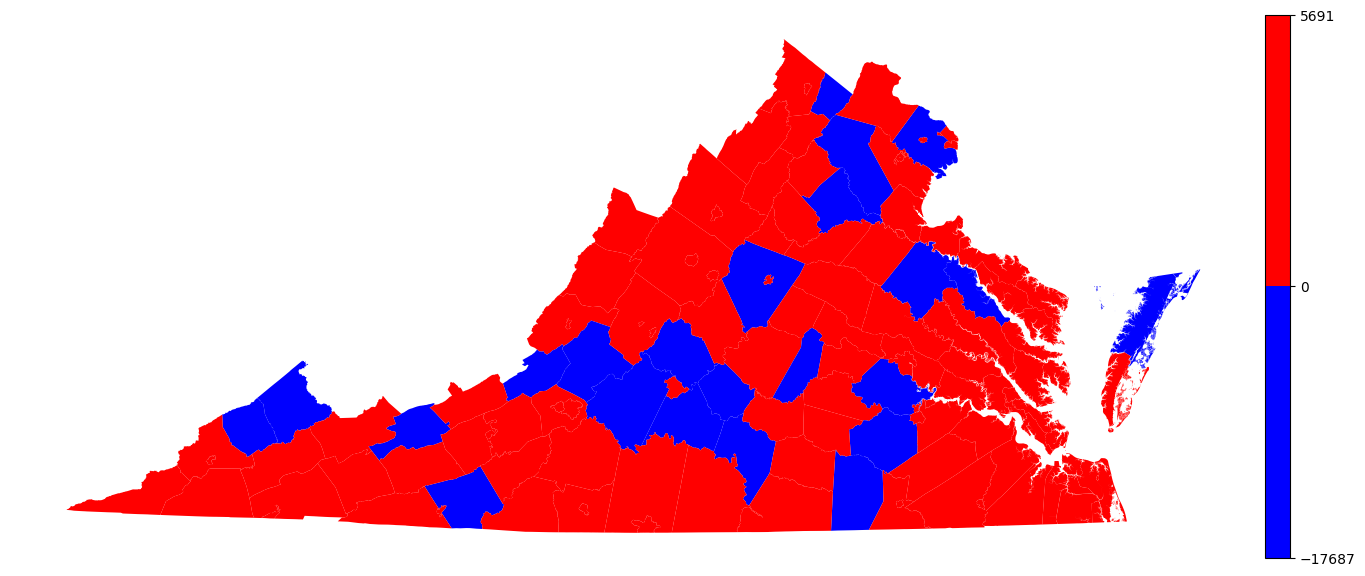

In [33]:
# Create a custom colormap with red for negative values and blue for positive values
from matplotlib.colors import ListedColormap, BoundaryNorm
# Define the colormap
my_colors = ['blue', 'white', 'red']
my_cmap = ListedColormap(my_colors)

# Define the bins and normalize and force 0 to be part of the colorbar
bounds = [np.min(df['vote_difference_2024']), 0.0, np.max(df['vote_difference_2024'])]
my_norm = BoundaryNorm(bounds, ncolors=len(my_colors));

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_difference_2024',legend=True,cax=cax,cmap=my_cmap, norm=my_norm)

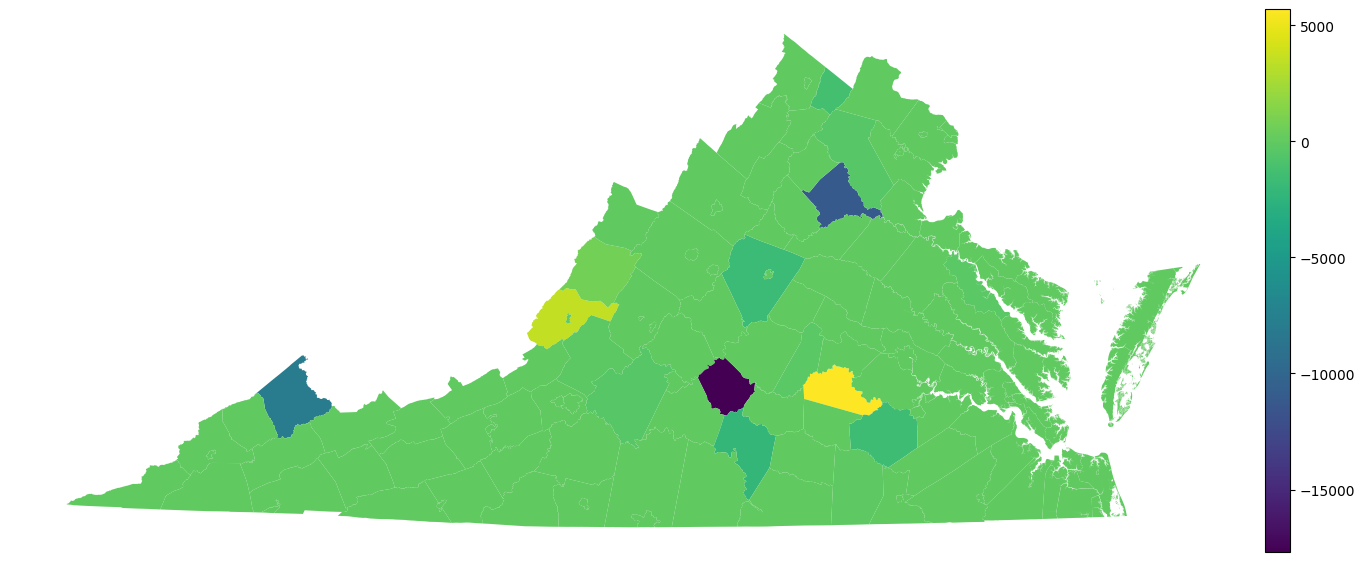

In [34]:
# Create a custom colormap with red for negative values and blue for positive values

# Plot the heatmap
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)

# Plot the heatmap with the custom colormap
df.plot(ax=ax, column='vote_difference_2024', legend=True, cax=cax)

plt.show()